In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

import tensorflow as tf
import pickle
import os
import glob
import random
import sys
import datetime
import wispy
import wispy.resnet
import wispy.logger
import wispy.utils
import wispy.callbacks
import wispy.model_utils
from tomlkit import parse
from tensorflow.keras.utils import get_custom_objects
import pugna.activations

plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

In [3]:
sys.path.append("../../")

In [4]:
import fit

In [5]:
get_custom_objects().update({'s2relu': pugna.activations.s2relu})

In [6]:
%matplotlib inline

In [7]:
glob.glob("009/checkpoint/*")[-1]

'009/checkpoint/cp-10000.ckpt'

In [8]:
config_file = "config_009.toml"

In [9]:
##### model = tf.keras.models.load_model('009/checkpoint/cp-08480.ckpt',
#                                    custom_objects={'ScaleLayer': wispy.mscalev3.ScaleLayer}
#                                   )

model = tf.keras.models.load_model('009/model.h5',
                                   custom_objects={'ScaleLayer': wispy.mscalev3.ScaleLayer}
                                  )

In [10]:
with open(config_file, "r") as f:
    text = f.read()

doc = parse(text)

In [11]:
doc['data']['train_root_dir']

'../training_data'

In [12]:
doc['data']['data_to_model']

'amps'

In [13]:
filename = doc['data']['y_preprocessing_params_file']
y_processing_params = np.load(filename)

In [14]:
# y_train = fit.load_coprec_data_and_apply_preproc(doc['data']['train_root_dir'], doc['data']['data_to_model'], y_processing_params)
# y_train = fit.load_coprec_data_and_apply_preproc(doc['data']['val_root_dir'], doc['data']['data_to_model'], y_processing_params)

y_train_22 = fit.load_coprec_data_and_apply_preproc(doc['data']['val_root_dir'], "amp_22", y_processing_params)
y_train_21 = fit.load_coprec_data_and_apply_preproc(doc['data']['val_root_dir'], "amp_21", y_processing_params)

In [15]:
y_train_22.shape

(1000, 1219)

In [16]:
filename = doc['data']['times_file']
times = np.load(filename)

pkl_filename = doc['data']['times_scaler']
with open(pkl_filename, 'rb') as file:
    times_scaler = pickle.load(file)

times_scaled = times_scaler.transform(times[:, np.newaxis])

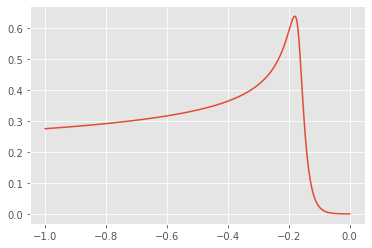

In [17]:
plt.figure()
plt.plot(times_scaled, y_train_22[0])

In [18]:
# filename = doc['data']['coords_train_file']
filename = doc['data']['coords_val_file']
coords_train = np.load(filename).T

In [19]:
def get_input_for_ann(times, coords):
    return np.column_stack((times[:, 0], (coords*np.ones(times.shape))))

In [20]:
X = get_input_for_ann(times_scaled, coords_train[0])

In [21]:
X.shape

(1219, 8)

In [22]:
coords_train.shape

(1000, 7)

In [23]:
model.predict(X)[:,0]

array([2.7550438e-01, 2.7554822e-01, 2.7559289e-01, ..., 9.8012388e-06,
       2.0943582e-05, 2.8457493e-05], dtype=float32)

In [24]:
def compare_amp22(index, model, times_scaled, coords, y_train):
    print(coords[index])
    X = get_input_for_ann(times_scaled, coords[index])
    yhat = model.predict(X)[:,0]
    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(times_scaled, y_train[index], label='data')
    plt.plot(times_scaled, yhat, label='model')
    plt.title("amp 22")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(times_scaled, y_train[index]-yhat)
    plt.show()
    plt.close()

In [25]:
def compare_amp21(index, model, times_scaled, coords, y_train):
    print(coords[index])
    X = get_input_for_ann(times_scaled, coords[index])
    yhat = model.predict(X)[:,1]
    
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 2, 1)
    plt.plot(times_scaled, y_train[index], label='data')
    plt.plot(times_scaled, yhat, label='model')
    plt.title("amp 21")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(times_scaled, y_train[index]-yhat)
    plt.show()
    plt.close()

[3.68486232 0.1371181  1.45643198 0.4630197  0.         0.
 0.        ]


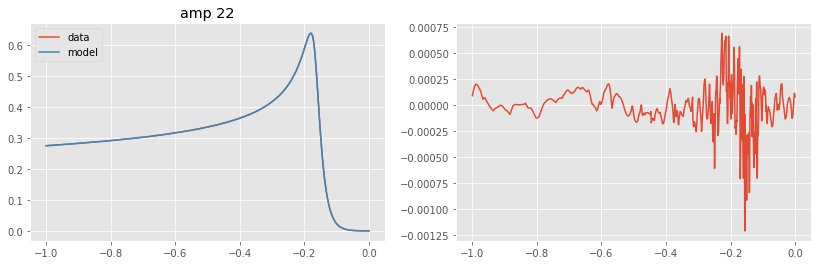

In [26]:
compare_amp22(0, model, times_scaled, coords_train, y_train_22)

[3.68486232 0.1371181  1.45643198 0.4630197  0.         0.
 0.        ]


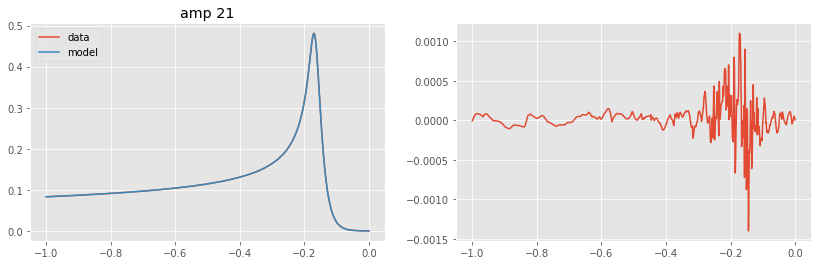

In [27]:
compare_amp21(0, model, times_scaled, coords_train, y_train_21)

633
[1.4527706  0.62507499 1.66419473 0.63338954 0.         0.
 0.        ]


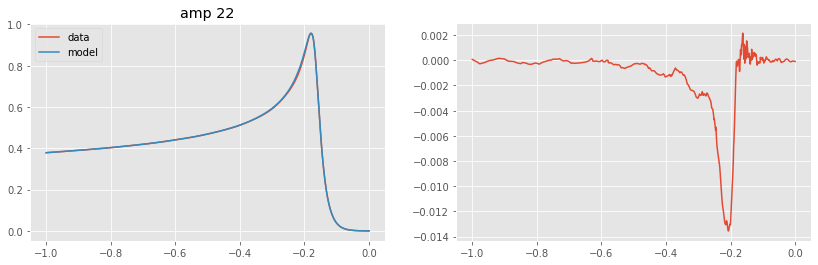

735
[3.65682589 0.32511397 1.24675245 2.03164801 0.         0.
 0.        ]


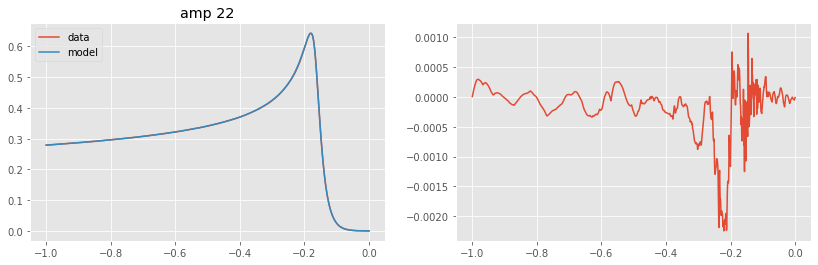

772
[1.07362137 0.05504621 1.82347535 4.29900435 0.         0.
 0.        ]


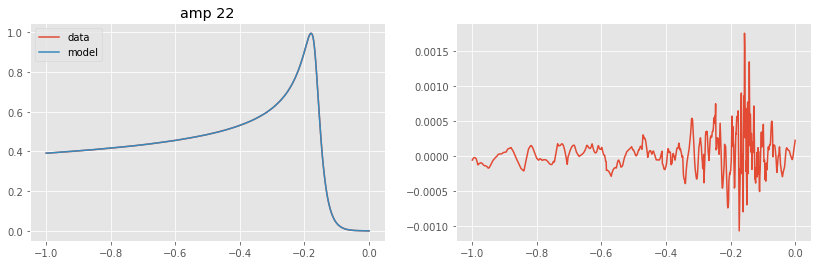

42
[2.61571702 0.60766926 2.71549292 3.14193814 0.         0.
 0.        ]


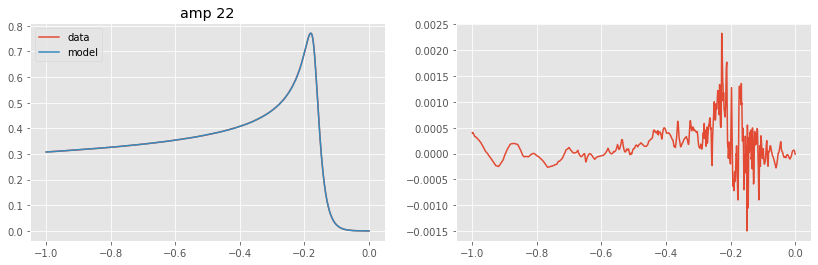

808
[1.5477952  0.25449814 2.53447346 0.37181407 0.         0.
 0.        ]


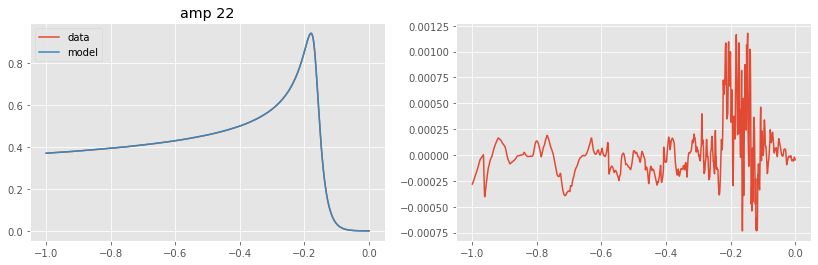

400
[1.24940725 0.56199477 1.17229211 0.63442073 0.         0.
 0.        ]


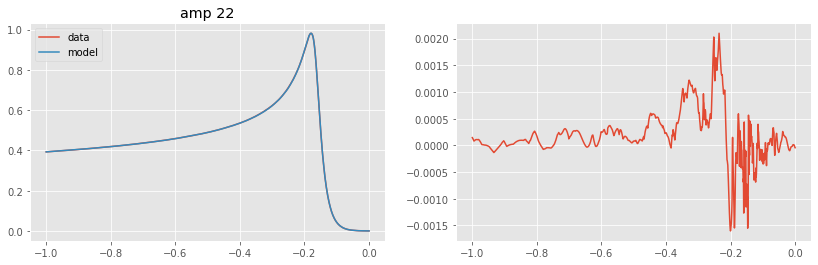

850
[1.14525268 0.49994357 1.57322838 1.22539396 0.         0.
 0.        ]


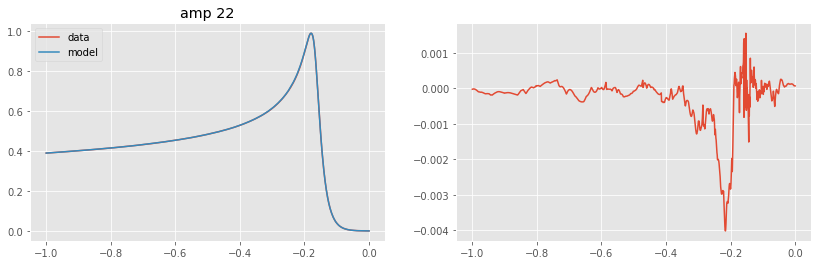

436
[1.21361089 0.82674862 0.82683757 4.76094052 0.         0.
 0.        ]


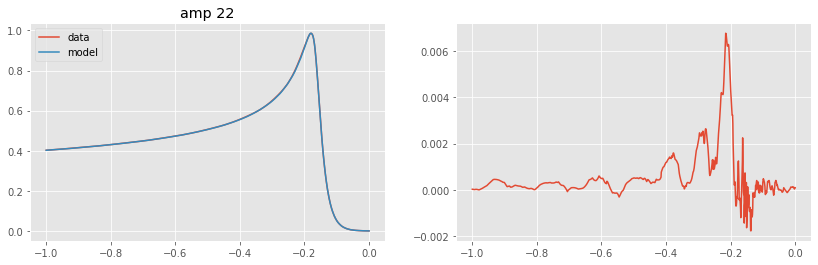

223
[2.92473493 0.19233133 0.55692859 2.61745811 0.         0.
 0.        ]


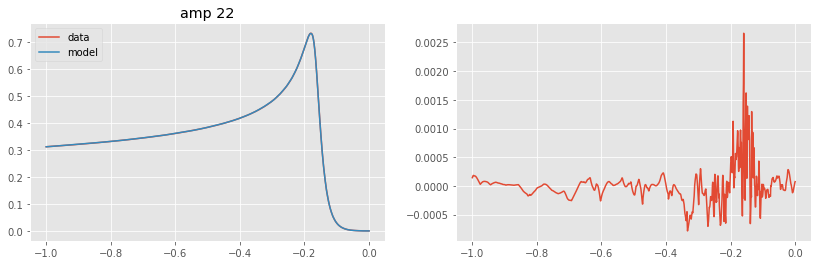

271
[1.10375329 0.71945582 1.73384769 1.13710186 0.         0.
 0.        ]


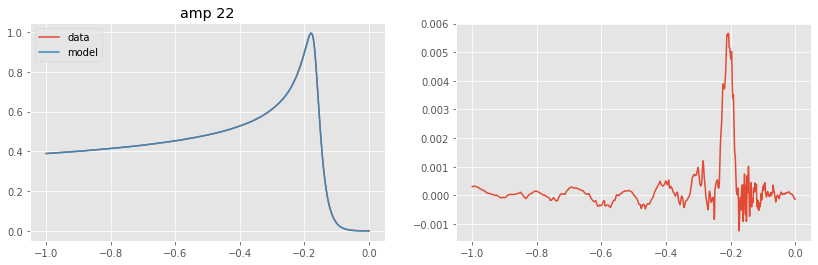

In [28]:
for i in random.sample(range(len(coords_train)), 10):
    print(i)
    compare_amp22(i, model, times_scaled, coords_train, y_train_22)

844
[1.60072072 0.21698475 1.37662033 3.41835032 0.         0.
 0.        ]


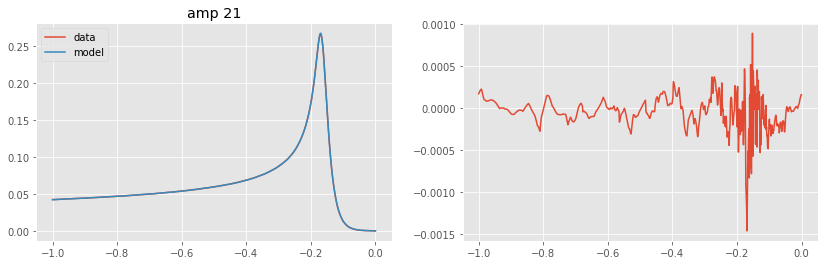

786
[2.77955061 0.64526717 0.3939324  4.18292797 0.         0.
 0.        ]


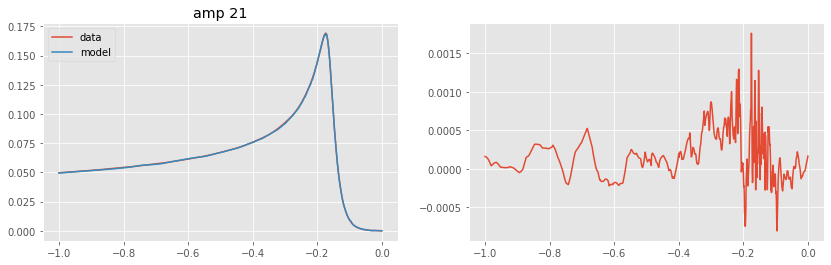

61
[2.90485783 0.61397012 1.67109709 5.51555873 0.         0.
 0.        ]


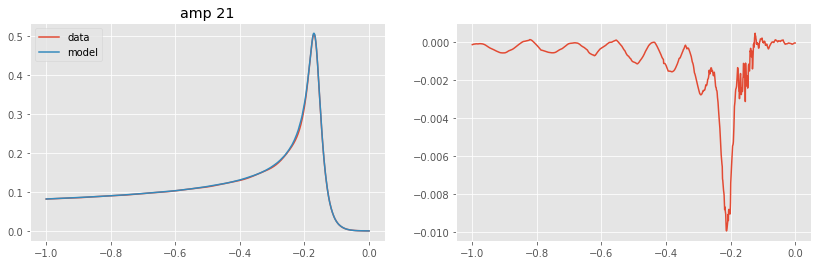

56
[2.20607392 0.20590633 2.24309837 3.95994353 0.         0.
 0.        ]


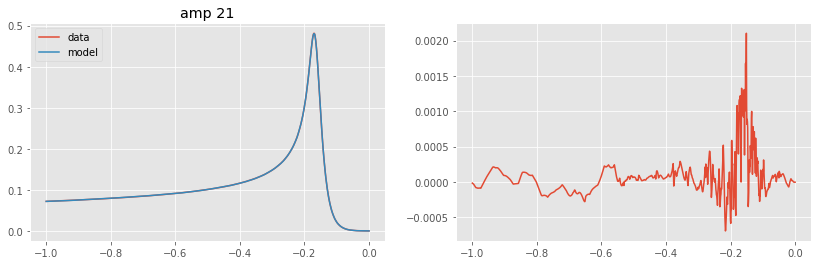

1
[2.80958318 0.13826517 1.63791869 2.00259587 0.         0.
 0.        ]


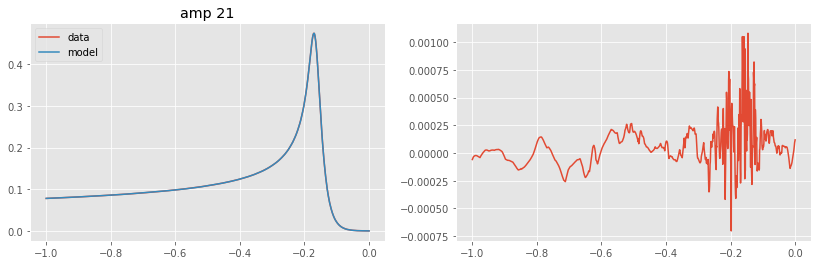

378
[2.67020737 0.77481985 1.77122683 3.30043615 0.         0.
 0.        ]


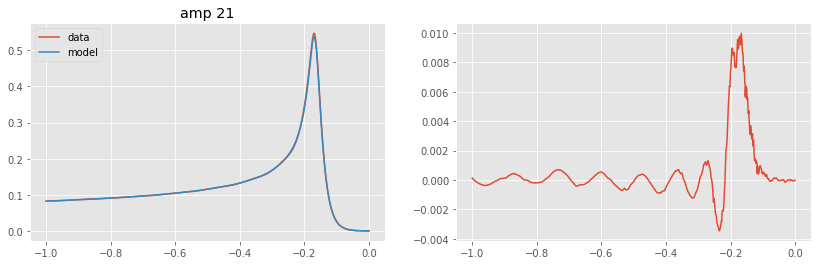

886
[1.87571294 0.3435651  2.46262557 4.01935749 0.         0.
 0.        ]


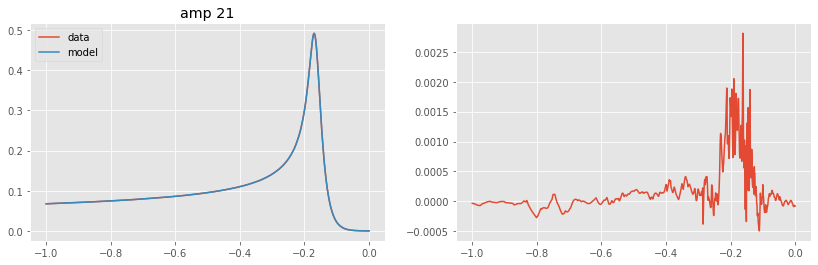

700
[3.0298774  0.26268763 1.96230194 0.39305435 0.         0.
 0.        ]


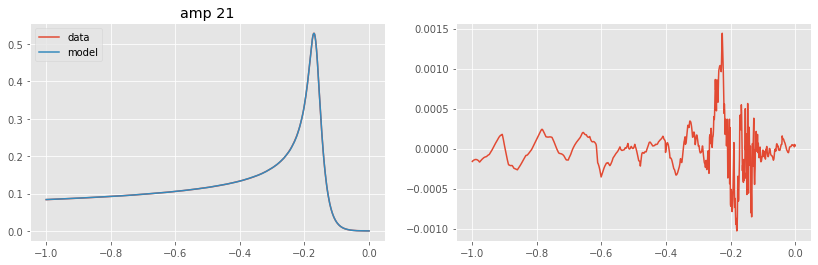

460
[2.28734378 0.88177368 0.6248912  6.03659428 0.         0.
 0.        ]


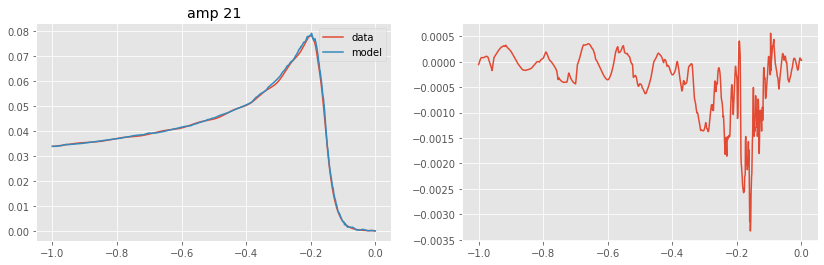

443
[1.76516147 0.94004777 1.10842121 5.31387097 0.         0.
 0.        ]


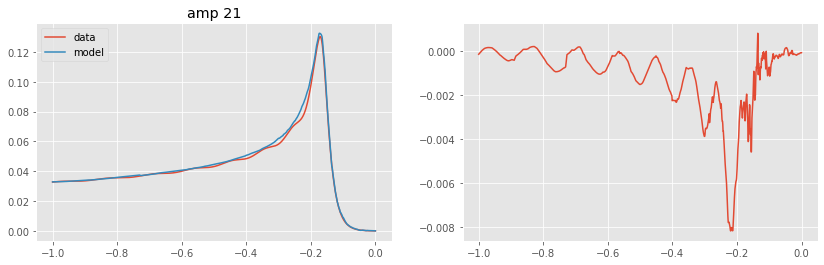

In [29]:
for i in random.sample(range(len(coords_train)), 10):
    print(i)
    compare_amp21(i, model, times_scaled, coords_train, y_train_21)

# look at first residual

In [34]:
def run_res_22(index, model, times_scaled, coords, y_train):
#     print(coords[index])
    X = get_input_for_ann(times_scaled, coords[index])
    yhat = model.predict(X)[:,0]
    y_true = y_train[index]
    
    return np.abs(y_true[0] - yhat[0])

In [41]:
%%time
first_res_22 = []
# for i in random.sample(range(len(coords_train)), 10):
for i in range(len(coords_train)):
    first_res_22.append(run_res_22(i, model, times_scaled, coords_train, y_train_22))

CPU times: user 4min 3s, sys: 33.2 s, total: 4min 36s
Wall time: 2min 27s


In [44]:
first_res_22 = np.array(first_res_22)

In [45]:
first_res_22.max()

0.0015022382177104499

In [46]:
first_res_22.argmax()

77

[3.90988067 0.98281192 0.55470951 5.87790564 0.         0.
 0.        ]


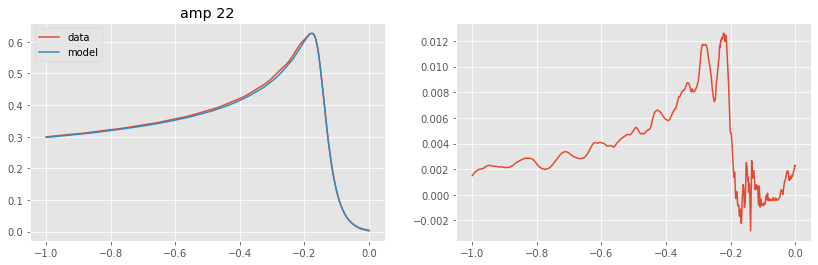

In [47]:
compare_amp22(77, model, times_scaled, coords_train, y_train_22)

In [49]:
(0.00150)/0.3

0.005